In [6]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("gabrielmanfredi/football-players-ratings")
#print("Path to dataset files:", path)

# Importation des packages et du Dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR

In [8]:
df = pd.read_csv('football_ratings_cleaned.csv')
df_avg = pd.read_csv('avg_football_ratings_cleaned.csv')

Nous allons opter dans un premier temps sur la sélection des variables avec une corrélation supérieur à 0.1 et inférieur à -0,1

In [9]:
Y = df['original_rating'] #Variable continue
X = df[['rater_SkySports','competition_Premier League 2017-18','rater_WhoScored','team_Manchester City',#Effets positifs
           'team_Tottenham','team_Liverpool','team_Manchester United','team_Burnley','team_England','team_Southampton',
           'team_Newcastle United','competition_World Cup 2018','team_Arsenal','team_Crystal Palace','rater_SofaScore','team_Leicester','team_Watford',
           'nombre_apparitions','team_Hannover 96','team_Hamburger SV','team_Wolfsburg','team_Schalke 04','team_Bayer Leverkusen','team_VfB Stuttgart',#Effets négatifs
           'team_Augsburg','team_Hertha Berlin','team_RasenBallsport Leipzig','team_Borussia Dortmund','team_Mainz 05','team_Werder Bremen',
           'team_Bayern Munich','team_Freiburg', 'team_Hoffenheim','is_human','rater_Kicker','competition_Bundesliga 2017-18','rater_Bild']]

Y_avg = df_avg['original_rating'] #Variable continue
X_avg = df_avg[['rater_SkySports','competition_Premier League 2017-18','rater_WhoScored','team_Manchester City',#Effets positifs
           'team_Tottenham','team_Liverpool','team_Manchester United','team_Burnley','team_England','team_Southampton',
           'team_Newcastle United','competition_World Cup 2018','team_Arsenal','team_Crystal Palace','rater_SofaScore','team_Leicester','team_Watford',
           'nombre_apparitions','team_Hannover 96','team_Hamburger SV','team_Wolfsburg','team_Schalke 04','team_Bayer Leverkusen','team_VfB Stuttgart',#Effets négatifs
           'team_Augsburg','team_Hertha Berlin','team_RasenBallsport Leipzig','team_Borussia Dortmund','team_Mainz 05','team_Werder Bremen',
           'team_Bayern Munich','team_Freiburg', 'team_Hoffenheim','is_human','rater_Kicker','competition_Bundesliga 2017-18','rater_Bild']]

In [18]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialiser le modèle Elastic Net
elastic_net = ElasticNet(random_state=42)

# Grille d'hyperparamètres
param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Coefficient de régularisation global
    'l1_ratio': np.linspace(0.1, 0.9, 9)  # Équilibre entre L1 (Lasso) et L2 (Ridge)
}

# Configuration de la recherche sur grille avec validation croisée
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Entraîner la recherche sur grille
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_elastic_net = grid_search.best_estimator_
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Prédictions et MSE
y_train_pred = best_elastic_net.predict(X_train)
y_test_pred = best_elastic_net.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE sur l'ensemble d'entraînement : {mse_train:.4f}")
print(f"MSE sur l'ensemble de test : {mse_test:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Meilleurs hyperparamètres : {'alpha': 0.0001, 'l1_ratio': 0.4}
MSE sur l'ensemble d'entraînement : 0.7260
MSE sur l'ensemble de test : 0.7344


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+04, tolerance: 1.136e+01
  model = cd_fast.enet_coordinate_descent(


In [10]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialiser le modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [ 10, 20, 50, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [ 2, 4, 10],  
    'max_features': ['auto', 'sqrt'],  
}

# Configuration de la recherche sur grille avec validation croisée
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Entraîner la recherche sur grille
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_rf = grid_search.best_estimator_
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Prédictions et MSE
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE sur l'ensemble d'entraînement : {mse_train:.4f}")
print(f"MSE sur l'ensemble de test : {mse_test:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
417 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

Meilleurs hyperparamètres : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
MSE sur l'ensemble d'entraînement : 0.6536
MSE sur l'ensemble de test : 0.6995


In [11]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ----- Gradient Boosting Regressor -----
gbr = GradientBoostingRegressor(random_state=42)
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)
best_gbr = grid_search_gbr.best_estimator_
print("Meilleurs hyperparamètres pour Gradient Boosting :", grid_search_gbr.best_params_)

# ----- XGBoost -----
xgbr = xgb.XGBRegressor(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10]
}
grid_search_xgb = GridSearchCV(xgbr, param_grid_xgb, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
print("Meilleurs hyperparamètres pour XGBoost :", grid_search_xgb.best_params_)

# ----- LightGBM -----
lgbr = lgb.LGBMRegressor(random_state=42)
param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20]
}
grid_search_lgb = GridSearchCV(lgbr, param_grid_lgb, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
best_lgb = grid_search_lgb.best_estimator_
print("Meilleurs hyperparamètres pour LightGBM :", grid_search_lgb.best_params_)

# ----- CatBoost -----
catboost = CatBoostRegressor(random_state=42, silent=True)
param_grid_cat = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5, 10]
}
grid_search_cat = GridSearchCV(catboost, param_grid_cat, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_cat.fit(X_train, y_train)
best_cat = grid_search_cat.best_estimator_
print("Meilleurs hyperparamètres pour CatBoost :", grid_search_cat.best_params_)

# ----- SVR -----
svr = SVR()
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale']
}
grid_search_svr = GridSearchCV(svr, param_grid_svr, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_
print("Meilleurs hyperparamètres pour SVR :", grid_search_svr.best_params_)

# ----- Evaluation des modèles -----
models = {
    "Gradient Boosting": best_gbr,
    "XGBoost": best_xgb,
    "LightGBM": best_lgb,
    "CatBoost": best_cat,
    "SVR": best_svr
}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"{name} - MSE Entraînement: {mse_train:.4f}, MSE Test: {mse_test:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs hyperparamètres pour XGBoost : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 40521, number of used features: 37
[LightGBM] [Info] Start training from score 5.683642
Meilleurs hyperparamètres pour LightGBM : {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators

KeyboardInterrupt: 

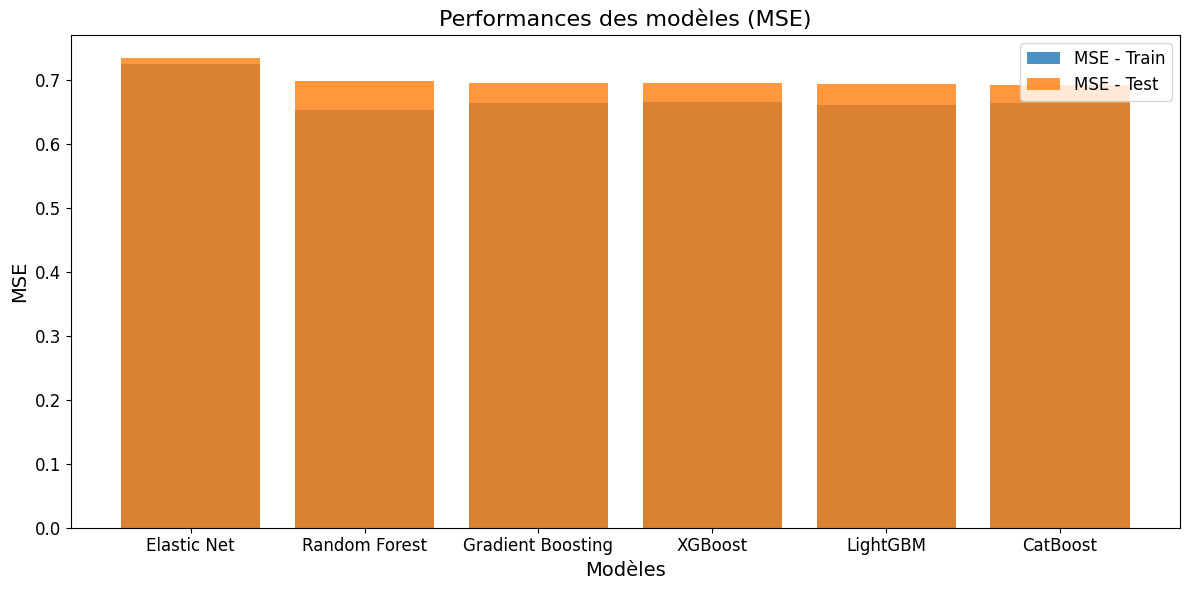

In [19]:
# Initialiser un dictionnaire pour stocker les performances des modèles
model_performance = {
    "Model": [],
    "Dataset": [],
    "MSE": []
}

# Fonction pour calculer et ajouter les performances au dictionnaire
def add_model_performance(model_name, model, X_train, y_train, X_test, y_test):
    """Calcule et ajoute les MSE des ensembles d'entraînement et de test."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    model_performance["Model"].append(model_name)
    model_performance["Dataset"].append("Train")
    model_performance["MSE"].append(mse_train)
    model_performance["Model"].append(model_name)
    model_performance["Dataset"].append("Test")
    model_performance["MSE"].append(mse_test)

# Ajouter les performances des modèles
add_model_performance("Elastic Net", best_elastic_net , X_train, y_train, X_test, y_test)
add_model_performance("Random Forest", best_rf, X_train, y_train, X_test, y_test)
add_model_performance("Gradient Boosting", best_gbr, X_train, y_train, X_test, y_test)
add_model_performance("XGBoost", best_xgb, X_train, y_train, X_test, y_test)
add_model_performance("LightGBM", best_lgb, X_train, y_train, X_test, y_test)
add_model_performance("CatBoost", best_cat, X_train, y_train, X_test, y_test)
#add_model_performance("SVM", best_svr, X_train, y_train, X_test, y_test)

# Convertir les performances en DataFrame
performance_df = pd.DataFrame(model_performance)

# Définir les couleurs pour les ensembles Train et Test
colors = {"Train": "#1f77b4", "Test": "#ff7f0e"}

# Générer un graphique à barres groupées pour les MSE
plt.figure(figsize=(12, 6))
for dataset in ["Train", "Test"]:
    subset = performance_df[performance_df["Dataset"] == dataset]
    plt.bar(subset["Model"], subset["MSE"], alpha=0.8, color=colors[dataset], label=f"MSE - {dataset}")

# Ajouter des détails au graphique
plt.title("Performances des modèles (MSE)", fontsize=16)
plt.ylabel("MSE", fontsize=14)
plt.xlabel("Modèles", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})
print(feature_importances.sort_values(by='Importance', ascending=False))

rater_Kicker: -2.6701
rater_Bild: -2.6260
team_Manchester City: 0.5004
rater_SofaScore: 0.3788
is_human: -0.3634
team_Liverpool: 0.3124
rater_WhoScored: 0.2624
team_Manchester United: 0.1956
team_Burnley: 0.1873
team_Bayern Munich: -0.1835
team_Hoffenheim: -0.1824
competition_Premier League 2017-18: -0.1772
team_Tottenham: 0.1743
team_Arsenal: 0.1699
team_Augsburg: -0.1460
team_Hamburger SV: 0.1169
team_Schalke 04: -0.1067
team_Wolfsburg: 0.1066
team_Bayer Leverkusen: -0.1047
team_Crystal Palace: 0.1008
team_Leicester: 0.0907
team_Werder Bremen: -0.0881
rater_SkySports: 0.0773
team_VfB Stuttgart: -0.0725
team_Hannover 96: -0.0705
team_Borussia Dortmund: -0.0666
team_Freiburg: -0.0664
team_England: 0.0542
team_RasenBallsport Leipzig: -0.0533
competition_Bundesliga 2017-18: -0.0507
team_Watford: -0.0445
team_Mainz 05: -0.0403
team_Newcastle United: 0.0385
team_Hertha Berlin: -0.0365
team_Southampton: 0.0358
competition_World Cup 2018: -0.0061
nombre_apparitions: 0.0021


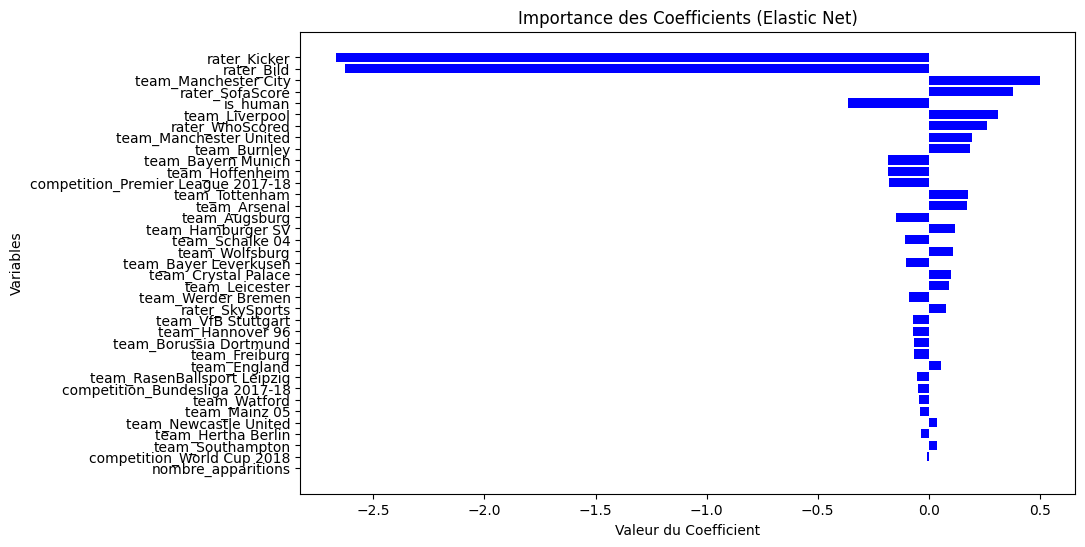

In [23]:
# Obtenir les coefficients du modèle Elastic Net optimisé
coefficients = best_elastic_net.coef_

# Afficher les coefficients avec les noms des variables
feature_names = X.columns  # Si X est un DataFrame Pandas, sinon remplace par une liste de noms
coef_dict = dict(zip(feature_names, coefficients))

# Trier et afficher les coefficients
sorted_coef = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in sorted_coef:
    print(f"{feature}: {coef:.4f}")
    
# Extraire les noms et valeurs des coefficients triés
features, values = zip(*sorted_coef)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(features, values, color="blue")
plt.xlabel("Valeur du Coefficient")
plt.ylabel("Variables")
plt.title("Importance des Coefficients (Elastic Net)")
plt.gca().invert_yaxis()  # Inverser l'ordre pour affichage lisible
plt.show()


In [24]:
# Initialiser un DataFrame pour stocker les importances des caractéristiques
all_feature_importances = pd.DataFrame()

# Fonction pour ajouter les importances au DataFrame global
def add_feature_importances(model_name, feature_importances, features):
    global all_feature_importances
    importance_df = pd.DataFrame({
        'Model': model_name,
        'Feature': features,
        'Importance': feature_importances
    })
    all_feature_importances = pd.concat([all_feature_importances, importance_df], ignore_index=True)

# Pour RF
add_feature_importances("Random Forest", best_rf.feature_importances_, X_train.columns)

# Ajouter les importances pour Gradient Boosting
add_feature_importances("Gradient Boosting", best_gbr.feature_importances_, X_train.columns)

# Ajouter les importances pour XGBoost
add_feature_importances("XGBoost", best_xgb.feature_importances_, X_train.columns)

# Ajouter les importances pour LightGBM
add_feature_importances("LightGBM", best_lgb.feature_importances_, X_train.columns)

# Ajouter les importances pour CatBoost
add_feature_importances("CatBoost", best_cat.feature_importances_, X_train.columns)

# Ajouter les importances pour SVR
#add_feature_importances("SVR", best_svr.feature_importances_, X_train.columns)

# Afficher les importances combinées
all_feature_importances = all_feature_importances.sort_values(by=['Model', 'Importance'], ascending=[True, False])
print(all_feature_importances) 

        Model                         Feature  Importance
182  CatBoost                    rater_Kicker   37.261749
181  CatBoost                        is_human   22.691509
184  CatBoost                      rater_Bild   22.219048
183  CatBoost  competition_Bundesliga 2017-18    7.019185
165  CatBoost              nombre_apparitions    3.806396
..        ...                             ...         ...
92    XGBoost                team_Hannover 96    0.000285
102   XGBoost                   team_Mainz 05    0.000262
97    XGBoost              team_VfB Stuttgart    0.000239
89    XGBoost                  team_Leicester    0.000231
88    XGBoost                 rater_SofaScore    0.000144

[185 rows x 3 columns]


C:\Users\valen\AppData\Local\Temp\ipykernel_6712\3141988659.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_features = all_feature_importances.groupby("Model").apply(


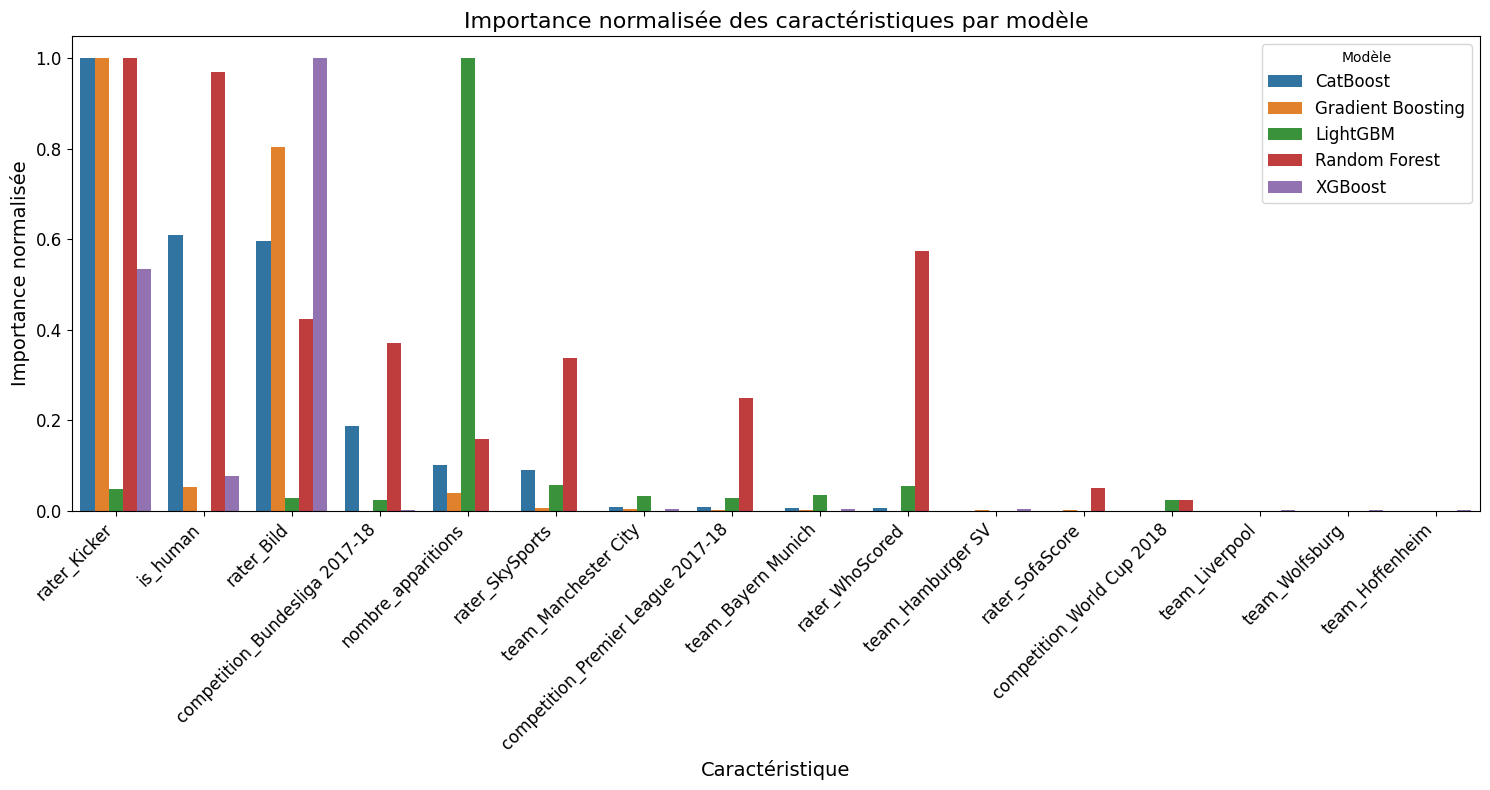

In [15]:
# Normalisation des importances (échelle 0-1) par modèle
all_feature_importances["Normalized Importance"] = all_feature_importances.groupby("Model")["Importance"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Sélectionner les N caractéristiques les plus importantes pour chaque modèle
top_n = 10  # Modifier cette valeur pour afficher plus ou moins de caractéristiques
top_features = all_feature_importances.groupby("Model").apply(
    lambda x: x.nlargest(top_n, "Normalized Importance")
).reset_index(drop=True)

# Créer un graphique à barres groupées
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_features,
    x="Feature",
    y="Normalized Importance",
    hue="Model",
    dodge=True
)
plt.title("Importance normalisée des caractéristiques par modèle", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Caractéristique", fontsize=14)
plt.ylabel("Importance normalisée", fontsize=14)
plt.legend(title="Modèle", fontsize=12)
plt.tight_layout()
plt.show()

Conformément à nos attentes, nous pouvons voir que l'évaluateur (et qu'il soit humain ou non) joue un rôle important dans les prédictions. Nous pouvons observer que noter le nombre d'occurence des joueurs est une idée intéressante car elle apparait dans les trois premières variables les plus importantes.

De manière évidente, le fait de participer à la première ligue joue également un rôle essentiel dans notre prédiction.

Nous pouvons voir que l'appartenance à certaines équipe ne joue pas de rôle directement important. Cependant en sommant l'importance de toutes ces dummies nous obtenons une importance plus importante (nous devons interpréter dans ce sens car variables complémentaires).

/!\ Probable corrélation entre l'équipe et le fait d'être en première ligue

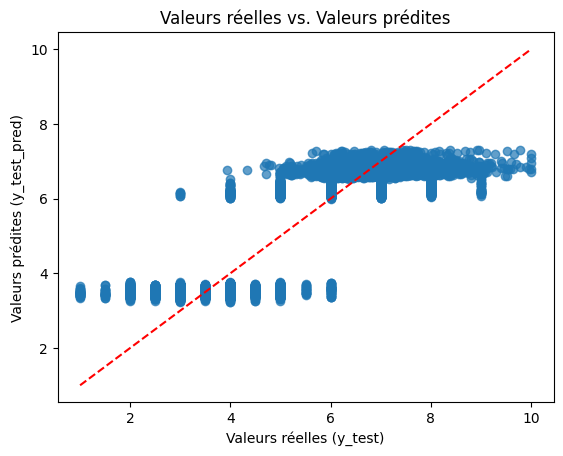

In [25]:
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.title("Valeurs réelles vs. Valeurs prédites")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_test_pred)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

Nous pouvons observer que notre modèle a plus difficulté à retrouver les valeurs réelles pour les joueurs les moins bons et les meilleurs, cela s'explique par le fait que ces deux catégories sont rares et par conséquent, notre modèle ne peut pas capturer assez de variabilité pour prédire ces scores.

# En enlevant les variables les moins importantes:

# /!\ N'est pas au point /!\

In [26]:
Y_reduce = df['original_rating'] #Variable continue
X_reduce = df[['rater_SkySports','competition_Premier League 2017-18','rater_WhoScored',
            'competition_World Cup 2018','rater_SofaScore','nombre_apparitions',
           'is_human','rater_Kicker','rater_Bild']]


# Diviser les données en ensembles d'entraînement et de test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduce, Y_reduce, test_size=0.2, random_state=42)

In [27]:
# Initialiser le modèle Elastic Net
elastic_net2 = ElasticNet(random_state=42)

# Grille d'hyperparamètres
param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Coefficient de régularisation global
    'l1_ratio': np.linspace(0.1, 0.9, 9)  # Équilibre entre L1 (Lasso) et L2 (Ridge)
}

# Configuration de la recherche sur grille avec validation croisée
grid_search = GridSearchCV(
    estimator=elastic_net2,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Entraîner la recherche sur grille
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_elastic_net2 = grid_search.best_estimator_
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Prédictions et MSE
y_train_pred2 = best_elastic_net2.predict(X_train)
y_test_pred2 = best_elastic_net2.predict(X_test)

mse_train = mean_squared_error(y_train2, y_train_pred2)
mse_test = mean_squared_error(y_test2, y_test_pred2)

print(f"MSE sur l'ensemble d'entraînement : {mse_train:.4f}")
print(f"MSE sur l'ensemble de test : {mse_test:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

In [268]:
# Initialiser le modèle Random Forest
rf2 = RandomForestRegressor(random_state=42)

# Grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [ 10, 20, 50, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [ 2, 4, 10],  
    'max_features': ['auto', 'sqrt'],  
}

# Configuration de la recherche sur grille avec validation croisée
grid_search2 = GridSearchCV(
    estimator=rf2,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Entraîner la recherche sur grille
grid_search2.fit(X_train2, y_train2)

# Meilleur modèle
best_rf2 = grid_search2.best_estimator_
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Prédictions et MSE
y_train_pred2 = best_rf2.predict(X_train2)
y_test_pred2 = best_rf2.predict(X_test2)

mse_train = mean_squared_error(y_train2, y_train_pred2)
mse_test = mean_squared_error(y_test2, y_test_pred2)

print(f"MSE sur l'ensemble d'entraînement : {mse_train:.4f}")
print(f"MSE sur l'ensemble de test : {mse_test:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
278 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

Meilleurs hyperparamètres : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE sur l'ensemble d'entraînement : 0.0685
MSE sur l'ensemble de test : 0.0790


In [270]:
# ----- Gradient Boosting Regressor -----
gbr2 = GradientBoostingRegressor(random_state=42)
param_grid_gbr2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search_gbr2 = GridSearchCV(gbr2, param_grid_gbr2, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_gbr2.fit(X_train2, y_train2)
best_gbr2 = grid_search_gbr2.best_estimator_
print("Meilleurs hyperparamètres pour Gradient Boosting :", grid_search_gbr2.best_params_)

# ----- XGBoost -----
xgbr2 = xgb.XGBRegressor(random_state=42)
param_grid_xgb2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
grid_search_xgb2 = GridSearchCV(xgbr2, param_grid_xgb2, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_xgb2.fit(X_train2, y_train2)
best_xgb2 = grid_search_xgb2.best_estimator_
print("Meilleurs hyperparamètres pour XGBoost :", grid_search_xgb2.best_params_)

# ----- LightGBM -----
lgbr2 = lgb.LGBMRegressor(random_state=42)
param_grid_lgb2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20]
}
grid_search_lgb2 = GridSearchCV(lgbr2, param_grid_lgb2, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_lgb2.fit(X_train2, y_train2)
best_lgb2 = grid_search_lgb2.best_estimator_
print("Meilleurs hyperparamètres pour LightGBM :", grid_search_lgb2.best_params_)

# ----- CatBoost -----
catboost2 = CatBoostRegressor(random_state=42, silent=True)
param_grid_cat2 = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 10]
}
grid_search_cat2 = GridSearchCV(catboost2, param_grid_cat2, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_cat2.fit(X_train2, y_train2)
best_cat2 = grid_search_cat2.best_estimator_
print("Meilleurs hyperparamètres pour CatBoost :", grid_search_cat2.best_params_)

# ----- SVR -----
svr2 = SVR()
param_grid_svr2 = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale']
}
grid_search_svr2 = GridSearchCV(svr2, param_grid_svr2, scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)
grid_search_svr2.fit(X_train2, y_train2)
best_svr2 = grid_search_svr2.best_estimator_
print("Meilleurs hyperparamètres pour SVR :", grid_search_svr2.best_params_)

# ----- Evaluation des modèles -----
models2 = {
    "Gradient Boosting": best_gbr2,
    "XGBoost": best_xgb2,
    "LightGBM": best_lgb2,
    "CatBoost": best_cat2,
    "SVR": best_svr2
}

for name2, model2 in models2.items():
    y_train_pred2 = model2.predict(X_train2)
    y_test_pred2 = model2.predict(X_test2)
    mse_train2 = mean_squared_error(y_train2, y_train_pred2)
    mse_test2 = mean_squared_error(y_test2, y_test_pred2)
    print(f"{name} - MSE Entraînement: {mse_train2:.4f}, MSE Test: {mse_test2:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs hyperparamètres pour XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1120
[LightGBM] [Info] Number of data points in the train set: 1305, number of used features: 9
[LightGBM] [Info] Start training from score 5.773370
Meilleurs hyperparamètres pour LightGBM : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 31}
Fitting 5 folds for each of 27 cand

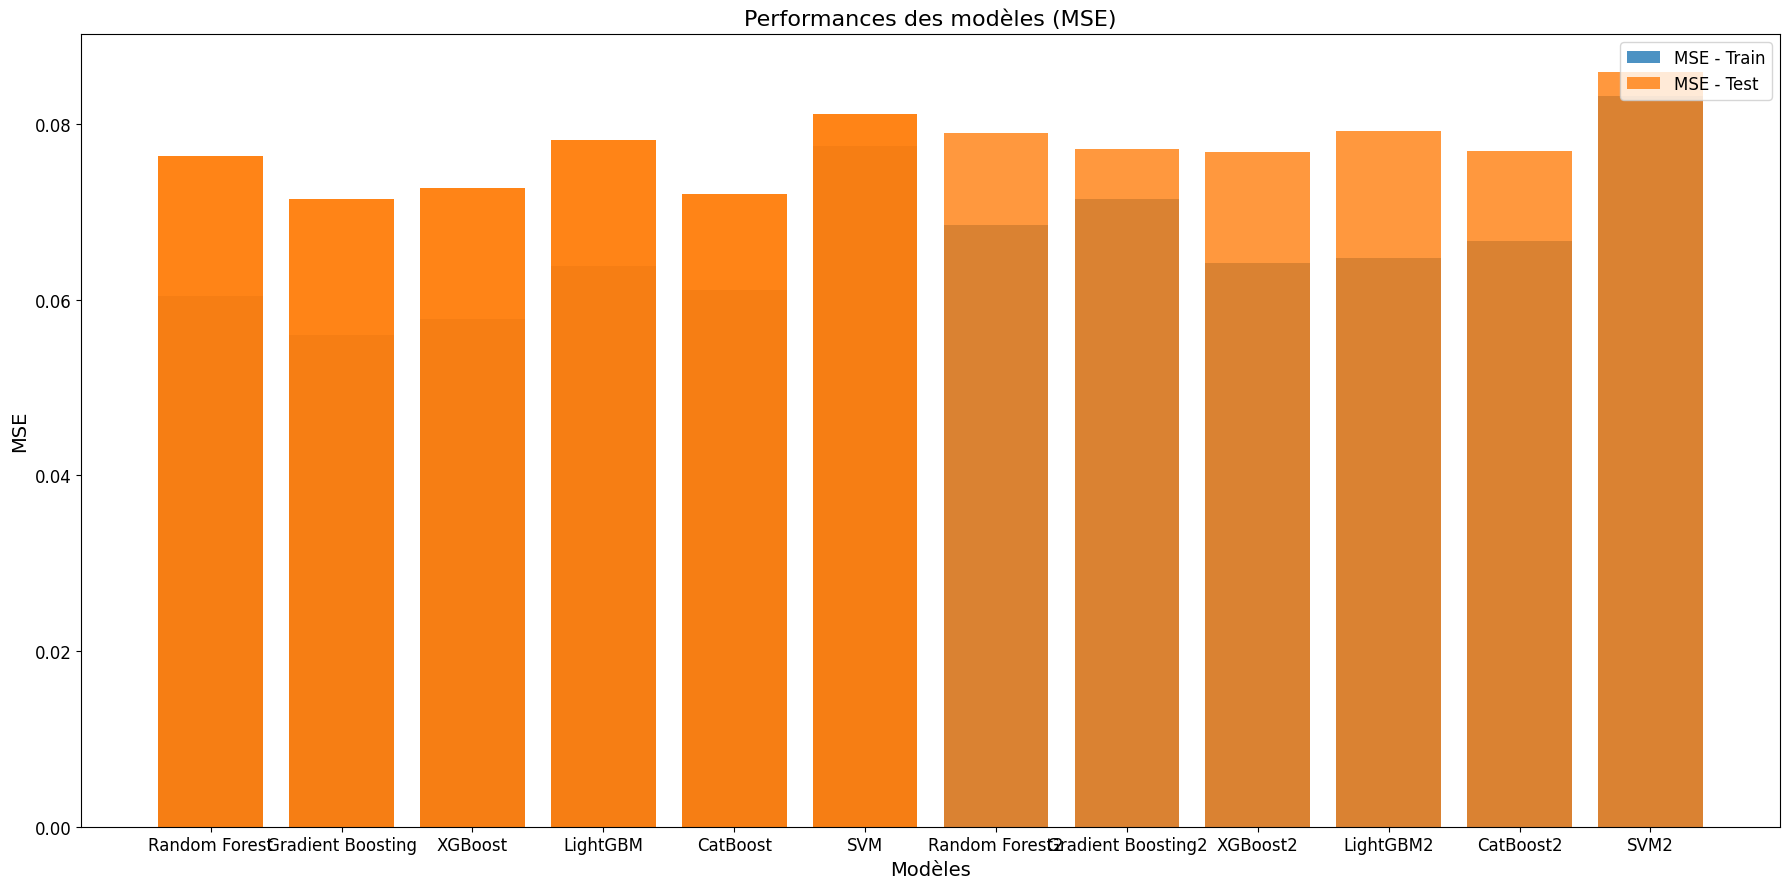

In [288]:
# Initialiser un dictionnaire pour stocker les performances des modèles
model_performance2 = {
    "Model": [],
    "Dataset": [],
    "MSE": []
}

# Fonction pour calculer et ajouter les performances au dictionnaire
def add_model_performance2(model_name, model, X_train2, y_train2, X_test2, y_test2):
    """Calcule et ajoute les MSE des ensembles d'entraînement et de test."""
    y_train_pred2 = model.predict(X_train2)
    y_test_pred2 = model.predict(X_test2)
    mse_train = mean_squared_error(y_train2, y_train_pred2)
    mse_test = mean_squared_error(y_test2, y_test_pred2)
    model_performance["Model"].append(model_name)
    model_performance["Dataset"].append("Train")
    model_performance["MSE"].append(mse_train)
    model_performance["Model"].append(model_name)
    model_performance["Dataset"].append("Test")
    model_performance["MSE"].append(mse_test)

# Ajouter les performances des modèles
add_model_performance("Random Forest", best_rf, X_train, y_train, X_test, y_test)
add_model_performance("Gradient Boosting", best_gbr, X_train, y_train, X_test, y_test)
add_model_performance("XGBoost", best_xgb, X_train, y_train, X_test, y_test)
add_model_performance("LightGBM", best_lgb, X_train, y_train, X_test, y_test)
add_model_performance("CatBoost", best_cat, X_train, y_train, X_test, y_test)
add_model_performance("SVM", best_svr, X_train, y_train, X_test, y_test)


add_model_performance2("Random Forest2", best_rf2, X_train2, y_train2, X_test2, y_test2)
add_model_performance2("Gradient Boosting2", best_gbr2, X_train2, y_train2, X_test2, y_test2)
add_model_performance2("XGBoost2", best_xgb2, X_train2, y_train2, X_test2, y_test2)
add_model_performance2("LightGBM2", best_lgb2, X_train2, y_train2, X_test2, y_test2)
add_model_performance2("CatBoost2", best_cat2, X_train2, y_train2, X_test2, y_test2)
add_model_performance2("SVM2", best_svr2, X_train2, y_train2, X_test2, y_test2)

# Convertir les performances en DataFrame
performance_df = pd.DataFrame(model_performance)

# Définir les couleurs pour les ensembles Train et Test
colors = {"Train": "#1f77b4", "Test": "#ff7f0e"}

# Générer un graphique à barres groupées pour les MSE
plt.figure(figsize=(18, 9))
for dataset in ["Train", "Test"]:
    subset = performance_df[performance_df["Dataset"] == dataset]
    plt.bar(subset["Model"], subset["MSE"], alpha=0.8, color=colors[dataset], label=f"MSE - {dataset}")

# Ajouter des détails au graphique
plt.title("Performances des modèles (MSE)", fontsize=16)
plt.ylabel("MSE", fontsize=14)
plt.xlabel("Modèles", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

In [280]:
model_performance2

{'Model': [], 'Dataset': [], 'MSE': []}

# Questions (pour guider l'idée):

1-Qu’est-ce qui constitue la performance d’un « bon » joueur de football ?

2-Dans quelle mesure pouvons-nous prédire les notes attribuées aux performances des joueurs avec ces données ?

3-Dans quelle mesure le fait de regarder le football depuis une perspective réseau peut-il nous aider à comprendre les performances des joueurs ?

4-Quels attributs de la performance d’un joueur sont les plus valorisés par les algorithmes ?

5-Quels attributs de la performance d’un joueur sont les plus valorisés par les experts humains (journalistes) ?

6-Quelles sont les principales différences entre les critères des algorithmes et ceux des experts humains pour évaluer les joueurs de football ?

7-Dans quelle mesure les notes attribuées aux performances des joueurs sont-elles biaisées par le résultat final du match ?

======================================================================================================

# Solutions:

1-Qu’est-ce qui constitue la performance d’un « bon » joueur de football ?

2-Dans quelle mesure pouvons-nous prédire les notes attribuées aux performances des joueurs avec ces données ?

Procédure: Pour répondre à cette question nous allons créer une variable dummy à partir de "df['original_rating']" qui prendra comme valeur 1 si le joueur et top 10%, 0 sinon.

======================================================================================================

3-Dans quelle mesure le fait de regarder le football depuis une perspective réseau peut-il nous aider à comprendre les performances des joueurs ?

Procédure:

======================================================================================================

4-Quels attributs de la performance d’un joueur sont les plus valorisés par les algorithmes ?

5-Quels attributs de la performance d’un joueur sont les plus valorisés par les experts humains (journalistes) ?

6-Quelles sont les principales différences entre les critères des algorithmes et ceux des experts humains pour évaluer les joueurs de football ?

Procédure: Pour répondre à ces questions nous pouvons suivre la procédure précédente mais en splittant le jeu de données en deux. Nous établierons des prédictions sur une table qui possède df[df['is_human']==1] et d'autres prédiction sur la seconde table df[df['is_human']==1]. Nous pourrons ensuite faire une comparaison de l'importance des features entre les deux modèles.

======================================================================================================

7-Dans quelle mesure les notes attribuées aux performances des joueurs sont-elles biaisées par le résultat final du match ?

Procédure: